In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

In [ ]:
ratings = pd.read_csv('gdrive/MyDrive/SC4020-data/ml-100k/u.data', sep='\t', header=None)
ratings

,0,1,2,3
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [ ]:
columns=['userid','itemid','rating','timestamp']
ratings.columns = columns #change the column names
ratings

,userid,itemid,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [ ]:
genere_data = pd.read_csv('gdrive/MyDrive/SC4020-data/ml-100k/u.genre', sep='\t', header=None)
genere_data.columns = ['genre']
genere_data #genre data

,genre
0,unknown|0
1,Action|1
2,Adventure|2
3,Animation|3
4,Children's|4
5,Comedy|5
6,Crime|6
7,Documentary|7
8,Drama|8
9,Fantasy|9


In [ ]:
m_cols = ['movie_id','movie_title',' releasedate','video_release_date','IMDb_URL','unknown','Action','Adventure','Animation','Childrens','Comedy','Crime','Documentary',
          'Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']

In [ ]:
items_data = pd.read_csv('gdrive/MyDrive/SC4020-data/ml-100k/u.item', sep='|', names=m_cols,encoding='latin-1')
items_data #items data

,movie_id,movie_title,releasedate,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Childrens,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
u_data = ratings

In [ ]:
movies_average_rating=u_data.groupby('itemid')['rating'].mean().sort_values(ascending=False).reset_index().rename(columns={'rating':'Average Rating'})
movies_average_rating.head()

,itemid,Average Rating
0,814,5.0
1,1599,5.0
2,1201,5.0
3,1122,5.0
4,1653,5.0
...,...,...
1677,1568,1.0
1678,1567,1.0
1679,1566,1.0
1680,1565,1.0


In [ ]:
movies_rating_count=u_data.groupby('itemid')['rating'].count().sort_values(ascending=True).reset_index().rename(columns={'rating':'Rating Count'}) #ascending=False
movies_rating_count_avg=movies_rating_count.merge(movies_average_rating, on='itemid')
movies_rating_count_avg.head()


,itemid,Rating Count,Average Rating
0,1682,1,3.0
1,814,1,5.0
2,1447,1,3.0
3,1593,1,4.0
4,1452,1,4.0


In [ ]:
ratings_data = ratings
ratings_data

,userid,itemid,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [ ]:
items_df = items_data
items_df

,movie_id,movie_title,releasedate,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Childrens,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
items_df_1 = items_df[['movie_id','movie_title','unknown','Action','Adventure','Animation','Childrens','Comedy','Crime','Documentary',
          'Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']]
items_df_1

,movie_id,movie_title,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
dataset = ratings_data.iloc[:,:3]
dataset

,userid,itemid,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1
...,...,...,...
99995,880,476,3
99996,716,204,5
99997,276,1090,1
99998,13,225,2


In [ ]:
dataset.rename(columns = {'itemid':'movie_id'}, inplace = True)
dataset

,userid,movie_id,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1
...,...,...,...
99995,880,476,3
99996,716,204,5
99997,276,1090,1
99998,13,225,2


In [ ]:
result_data = pd.merge(dataset, items_df_1, how="inner", on=["movie_id"])
result_data

,userid,movie_id,rating,movie_title,unknown,Action,Adventure,Animation,Childrens,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,Kolya (1996),0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,63,242,3,Kolya (1996),0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,226,242,5,Kolya (1996),0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,154,242,3,Kolya (1996),0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,306,242,5,Kolya (1996),0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,840,1674,4,Mamma Roma (1962),0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99996,655,1640,3,"Eighth Day, The (1996)",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99997,655,1637,3,Girls Town (1996),0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99998,655,1630,3,"Silence of the Palace, The (Saimt el Qusur) (1...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
lc = LabelEncoder()
data_new = result_data
data_new['movie_title']= lc.fit_transform(result_data['movie_title'])
data_new

,userid,movie_id,rating,movie_title,unknown,Action,Adventure,Animation,Childrens,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,825,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,63,242,3,825,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,226,242,5,825,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,154,242,3,825,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,306,242,5,825,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,840,1674,4,927,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99996,655,1640,3,454,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99997,655,1637,3,606,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99998,655,1630,3,1330,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_data_df,valid_data_df = train_test_split(data_new,test_size=0.2)

In [ ]:
train_data_df.reset_index(drop=True)
valid_data_df.reset_index(drop=True)


,userid,movie_id,rating,movie_title,unknown,Action,Adventure,Animation,Childrens,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,334,1010,5,129,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,423,748,3,1274,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,869,284,1,1497,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,373,117,4,1251,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,665,237,3,780,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1,200,3,1322,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
19996,314,996,4,169,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
19997,121,57,5,1175,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19998,363,8,5,109,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data_new.isnull().sum()

userid         0
movie_id       0
rating         0
movie_title    0
unknown        0
Action         0
Adventure      0
Animation      0
Childrens      0
Comedy         0
Crime          0
Documentary    0
Drama          0
Fantasy        0
Film-Noir      0
Horror         0
Musical        0
Mystery        0
Romance        0
Sci-Fi         0
Thriller       0
War            0
Western        0
dtype: int64

In [ ]:
data_new.shape

(100000, 23)

In [ ]:
num_users_hybrid = len(train_data_df.userid)
num_movie_items_hybrid = len(train_data_df.movie_id)
print(num_users_hybrid, num_movie_items_hybrid)

80000 80000


In [ ]:
class NeuralNet(nn.Module):
    def __init__(self, num_users, num_items, emb_size=100, n_hidden=10):
        super(NeuralNet, self).__init__()
        self.user_emb = nn.Embedding(num_users, emb_size)
        self.item_emb = nn.Embedding(num_items, emb_size)
        self.layer1 = nn.Linear(emb_size*2 + n_hidden+n_hidden - 1, n_hidden)
        self.layer2 = nn.Linear(n_hidden, 1)
        self.drop1 = nn.Dropout(0.1)

    def forward(self, u, v):
        user = self.user_emb(u)
        movie = self.item_emb(v[:,1])
        movie_features = v[:,4:]
        x = F.relu(torch.cat([user, movie,movie_features], dim=1))
        x = self.drop1(x)
        x = F.relu(self.layer1(x))
        x = self.layer2(x)
        return x

In [ ]:
def train_epocs_hybrid(model, epochs=10, lr=0.01, wd=0.0, unsqueeze=False):
    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=wd)
    model.train()
    for i in range(epochs):
        users = torch.LongTensor(train_data_df.userid.values) # .cuda()
        items = torch.LongTensor(train_data_df.values) #.cuda()
        ratings = torch.FloatTensor(train_data_df.rating.values) #.cuda()
        if unsqueeze:
            ratings = ratings.unsqueeze(1)
        y_hat = model(users, items)
        loss = F.mse_loss(y_hat, ratings)
        train_mse_hybrid.append((i, loss.item()))
        if (i+1) % 10 == 0:
          print("Iteration: %d ; error = %.4f" % (i+1, loss.item()))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    test_loss_hybrid(model, unsqueeze)

In [ ]:
def test_loss_hybrid(model, unsqueeze=False):
    model.eval()
    users = torch.LongTensor(valid_data_df.userid.values) #.cuda()
    items = torch.LongTensor(valid_data_df.values) #.cuda()
    ratings = torch.FloatTensor(valid_data_df.rating.values) #.cuda()
    if unsqueeze:
        ratings = ratings.unsqueeze(1)
    y_hat = model(users, items)
    loss = F.mse_loss(y_hat, ratings)
    print("test loss %.3f " % loss.item())

In [ ]:
model_hybrid_20 = NeuralNet(num_users_hybrid, num_movie_items_hybrid, emb_size=20)
model_hybrid_20

NeuralNet(
  (user_emb): Embedding(80000, 20)
  (item_emb): Embedding(80000, 20)
  (layer1): Linear(in_features=59, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=1, bias=True)
  (drop1): Dropout(p=0.1, inplace=False)
)

In [ ]:
train_mse_hybrid = []
train_epocs_hybrid(model_hybrid_20, epochs=20, lr=0.01, wd=1e-6, unsqueeze=True)

Iteration: 10 ; error = 7.7591
Iteration: 20 ; error = 1.7328
test loss 1.630 


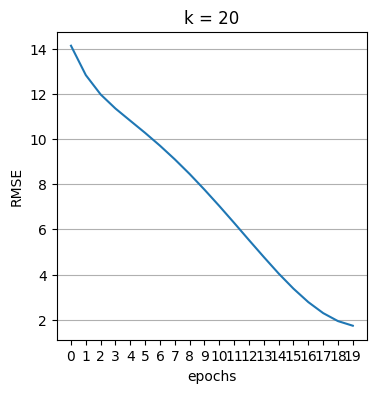

In [ ]:
x = [x for x, y in train_mse_hybrid]
y = [y for x, y in train_mse_hybrid]
plt.figure(figsize=((4,4)))
plt.plot(x, y)
plt.xticks(x, x)
plt.title("k = 20")
plt.xlabel("epochs")
plt.ylabel("RMSE")
plt.grid(axis="y")

In [ ]:
model_hybrid_30 = NeuralNet(num_users_hybrid, num_movie_items_hybrid, emb_size=30)
model_hybrid_30

NeuralNet(
  (user_emb): Embedding(80000, 30)
  (item_emb): Embedding(80000, 30)
  (layer1): Linear(in_features=79, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=1, bias=True)
  (drop1): Dropout(p=0.1, inplace=False)
)

In [ ]:
train_mse_hybrid = []
train_epocs_hybrid(model_hybrid_30, epochs=20, lr=0.01, wd=1e-6, unsqueeze=True)

Iteration: 10 ; error = 2.4653
Iteration: 20 ; error = 2.2217
test loss 1.848 


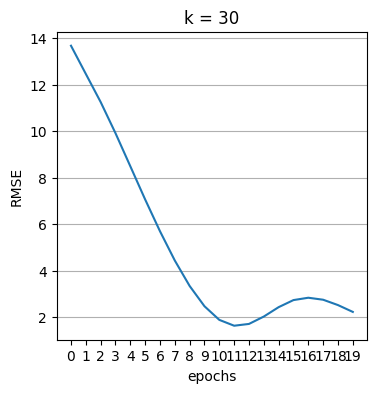

In [ ]:
x = [x for x, y in train_mse_hybrid]
y = [y for x, y in train_mse_hybrid]
plt.figure(figsize=((4,4)))
plt.plot(x, y)
plt.xticks(x, x)
plt.title("k = 30")
plt.xlabel("epochs")
plt.ylabel("RMSE")
plt.grid(axis="y")

In [ ]:
model_hybrid_40 = NeuralNet(num_users_hybrid, num_movie_items_hybrid, emb_size=40)
model_hybrid_40

NeuralNet(
  (user_emb): Embedding(80000, 40)
  (item_emb): Embedding(80000, 40)
  (layer1): Linear(in_features=99, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=1, bias=True)
  (drop1): Dropout(p=0.1, inplace=False)
)

In [ ]:
train_mse_hybrid = []
train_epocs_hybrid(model_hybrid_40, epochs=20, lr=0.01, wd=1e-6, unsqueeze=True)

Iteration: 10 ; error = 3.2189
Iteration: 20 ; error = 1.6577
test loss 1.711 


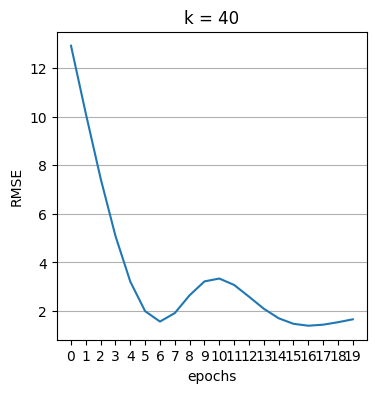

In [ ]:

x = [x for x, y in train_mse_hybrid]
y = [y for x, y in train_mse_hybrid]
plt.figure(figsize=((4,4)))
plt.plot(x, y)
plt.xticks(x, x)
plt.title("k = 40")
plt.xlabel("epochs")
plt.ylabel("RMSE")
plt.grid(axis="y")

In [ ]:
model_hybrid_50 = NeuralNet(num_users_hybrid, num_movie_items_hybrid, emb_size=50)
model_hybrid_50

NeuralNet(
  (user_emb): Embedding(80000, 50)
  (item_emb): Embedding(80000, 50)
  (layer1): Linear(in_features=119, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=1, bias=True)
  (drop1): Dropout(p=0.1, inplace=False)
)

In [ ]:
train_mse_hybrid = []
train_epocs_hybrid(model_hybrid_50, epochs=20, lr=0.01, wd=1e-6, unsqueeze=True)

Iteration: 10 ; error = 1.9358
Iteration: 20 ; error = 1.3392
test loss 1.377 


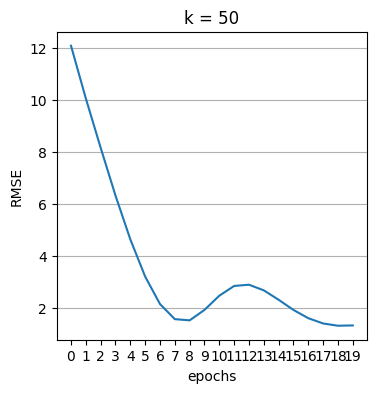

In [ ]:
x = [x for x, y in train_mse_hybrid]
y = [y for x, y in train_mse_hybrid]
plt.figure(figsize=((4,4)))
plt.plot(x, y)
plt.xticks(x, x)
plt.title("k = 50")
plt.xlabel("epochs")
plt.ylabel("RMSE")
plt.grid(axis="y")

In [ ]:
npRecommend_10 = data_new[data_new.userid == 5].to_numpy()
npRecommend_val = model_hybrid_50(torch.LongTensor(npRecommend_10[:,0]),torch.LongTensor(npRecommend_10)).detach().numpy().reshape(-1)

In [ ]:
indecies =  np.argsort(npRecommend_val)[-10:][::-1]
indecies

array([ 36,  50,  15,  87,   5,  74,  65, 123, 102, 121])

In [ ]:
recommded_itemid_10_hybrid = u_data['itemid'].unique()[indecies]  # taking top 10
print(recommded_itemid_10_hybrid)

[ 603  432  785 1016  474 1444  232  379   96  658]


In [ ]:
recommendedMovies_10_hybrid = items_data[items_data.movie_id.isin(recommded_itemid_10_hybrid)]
top10k_hybrid = pd.DataFrame(recommendedMovies_10_hybrid['movie_title'])
top10k_hybrid =top10k_hybrid.reset_index(drop=True)
top10k_hybrid = top10k_hybrid.reset_index()
top10k_hybrid = top10k_hybrid.rename(columns={'index':'top 10'})
px.line(top10k_hybrid,x='top 10',y='movie_title',width=600)

In [ ]:
top10k_hybrid

,top 10,movie_title
0,0,Terminator 2: Judgment Day (1991)
1,1,Young Guns (1988)
2,2,Tales From the Crypt Presents: Demon Knight (1...
3,3,Fantasia (1940)
4,4,Dr. Strangelove or: How I Learned to Stop Worr...
5,5,Rear Window (1954)
6,6,Pump Up the Volume (1990)
7,7,Only You (1994)
8,8,Con Air (1997)
9,9,That Darn Cat! (1965)
